# Custom Transformer

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import set_config; set_config(display='diagram')

👇 Consider the following dataset

In [17]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,days_until_delivery
0,RJ,SP,1825,53,10,40,9
1,RJ,SP,700,65,18,28,9
2,RJ,SP,1825,53,10,40,11
3,RJ,SP,1825,53,10,40,12
4,RJ,SP,1825,53,10,40,14


- Each observation of the dataset represents an item being delivered from a  `seller_state` to a `customer_state`. 
- Other columns describe the packaging properties of each item.

🎯 The target is the number of days between the order and the delivery.

<AxesSubplot:xlabel='days_until_delivery', ylabel='Count'>

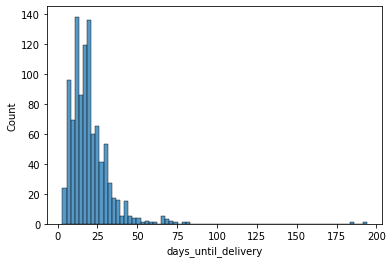

In [18]:
# Check target
sns.histplot(data.days_until_delivery)

In [22]:
X_train = data.drop(["days_until_delivery"], axis = 1)
y_train = data["days_until_delivery"]


## 1. Pipeline

👇 Create a scikit-learn pipeline named `pipe`:

- Engineer a `volume` feature from the dimensions features
- Preserve the original product dimensions features for training
- Scale all numerical features
- Encode the categorical features
- Add a default `Ridge` regression estimator

<details><summary>Hints</summary>

- There are many ways to create your preprocessed matrix (using `ColumnTransformer` and/or `FeatureUnion`). 
    
- If your transformed feature matrix look wierd, it may be stored as "sparse" by the default behavior of `OneHotEncoder(sparse=True)`. Use `.todense()` to turn it back to a dense matrix

</details>

In [25]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge


#Engineer a volume feature from the dimensions features
volume_constructor = FunctionTransformer(lambda df: pd.DataFrame(df["product_length_cm"] 
                                                                 * df["product_height_cm"]
                                                                 * df["product_width_cm"]
                                                                )
                                        )
# Preserve the original product dimensions features for training
# Scale all numerical features
# Encode the categorical features                                   

preprocessor = ColumnTransformer([
    ('num_tr', StandardScaler(), ['product_weight_g']),
    ('cat_tr', OneHotEncoder(handle_unknown = 'ignore'), ['customer_state', 'seller_state'])]
    ,remainder = 'passthrough'
)

union = FeatureUnion([
    ('preprocess', preprocessor),
    ('volume', volume_constructor)
])

# Add a default Ridge regression estimator

pipe = make_pipeline(union, Ridge())
pipe

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('preprocess',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('num_tr',
                                                                                  StandardScaler(),
                                                                                  ['product_weight_g']),
                                                                                 ('cat_tr',
                                                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                                  ['customer_state',
                                                                                   'seller_state'])])),
                                                ('volume',
                                                 FunctionTransformer(func=<function <lambda> at 0x135d2cd30>))])),
                ('ridge', Ridge())])

#### 🧪 Test your pipe

In [27]:
from nbresult import ChallengeResult

pipe_test = pipe

# Check that it doesn't crash
assert pipe_test.fit(X_train,y_train)

result = ChallengeResult('pipe', 
                         shape = pipe_test[:-1].fit_transform(X_train).shape
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.9.8, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/josephgulay/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/josephgulay/code/roadbusta/data-challenges-recap/05-ML/08-Workflow/02-Custom-Transformer
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_pipe.py::TestPipe::test_pipe_not_crashing PASSED              [100%]

============================== 1 passed in 0.77s ===============================


💯 You can commit your code:

git add tests/pipe.pickle

git commit -m 'Completed pipe step'

git push origin master


## 2. Train and Predict

👇 Let's imagine `data` is your entire training set.

- `cross_validate` your pipeline on this dataset (❗️low r2 score are expected)
- Now, imagine you just received an new order `new_data`: predict it's duration of delivery in a variable `prediction`

In [28]:
new_data = pd.read_csv("data_new.csv")
new_data

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,RJ,SP,1825,53,10,40


In [29]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X_train, y_train, cv = 5, scoring = 'r2').mean()

0.015397139307664575

In [31]:
#Train pipeline
pipe.fit(X_train, y_train)

# Make predictions
prediction = pipe.predict(new_data)



In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
    prediction = prediction
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.9.8, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/josephgulay/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/josephgulay/code/roadbusta/data-challenges-recap/05-ML/08-Workflow/02-Custom-Transformer
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


🏁 Congratulation. Don't forget to add, commit and push your notebook.